
Assignment 5- Machine Learning for Genomic Data. Task: Apply machine learning algorithms, such as random forests or support vector machines, to classify genomic data based on specific features or markers. Deliverable: A comprehensive analysis report presenting the classification results, model performance evaluation, and insights into the predictive features.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Load the dataset
file_path = 'Genomics.csv'  # Adjust path if needed
genomics_data = pd.read_csv('Genomics.csv')

# Display the first few rows
genomics_data.head()

,date,area,area_type,variant_name,specimens,percentage,specimens_7d_avg,percentage_7d_avg
0,01-01-2021,California,State,Alpha,1,1.69,NaN,NaN
1,01-01-2021,California,State,Lambda,0,0.00,NaN,NaN
2,01-01-2021,California,State,Other,29,49.15,NaN,NaN
3,01-01-2021,California,State,Epsilon,28,47.46,NaN,NaN
4,01-01-2021,California,State,Omicron,1,1.69,NaN,NaN


In [ ]:
# Drop rows with missing values
genomics_data = genomics_data.dropna()

# Encode the target variable (variant_name) using LabelEncoder
label_encoder = LabelEncoder()
genomics_data['variant_label'] = label_encoder.fit_transform(genomics_data['variant_name'])

# Features and target
X = genomics_data[['specimens', 'percentage', 'specimens_7d_avg', 'percentage_7d_avg']]
y = genomics_data['variant_label']

# Fill any remaining NaN values with 0 in the feature columns (for safety)
X.fillna(0, inplace=True)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [ ]:
# Initialize the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model performance
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest Accuracy Score:", accuracy_score(y_test, y_pred_rf))


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.20      0.28       131
           1       0.15      0.87      0.26       137
           2       0.57      0.34      0.43       144
           3       0.56      0.16      0.24       160
           4       0.54      0.15      0.24       164
           5       0.33      0.05      0.09       167
           6       0.39      0.09      0.14       147
           7       0.82      0.61      0.70       160
           8       0.71      0.81      0.76       169
           9       1.00      1.00      1.00       167

    accuracy                           0.43      1546
   macro avg       0.56      0.43      0.41      1546
weighted avg       0.57      0.43      0.42      1546

Random Forest Accuracy Score: 0.4320827943078913


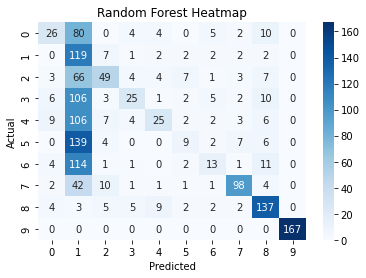

In [ ]:
#heatmap for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
svm_classifier = SVC(kernel='linear')

svm_classifier.fit(X_train, y_train)

y_pred_svm = svm_classifier.predict(X_test)

print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))
print("SVM Accuracy Score:", accuracy_score(y_test, y_pred_svm))

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.09      0.13       131
           1       0.14      0.95      0.24       137
           2       0.67      0.03      0.05       144
           3       0.45      0.03      0.06       160
           4       0.11      0.07      0.09       164
           5       0.00      0.00      0.00       167
           6       0.26      0.06      0.10       147
           7       0.64      0.52      0.57       160
           8       0.39      0.13      0.19       169
           9       0.96      1.00      0.98       167

    accuracy                           0.29      1546
   macro avg       0.38      0.29      0.24      1546
weighted avg       0.39      0.29      0.25      1546

SVM Accuracy Score: 0.2871927554980595


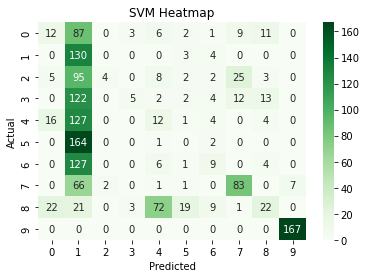

In [ ]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens')
plt.title('SVM Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

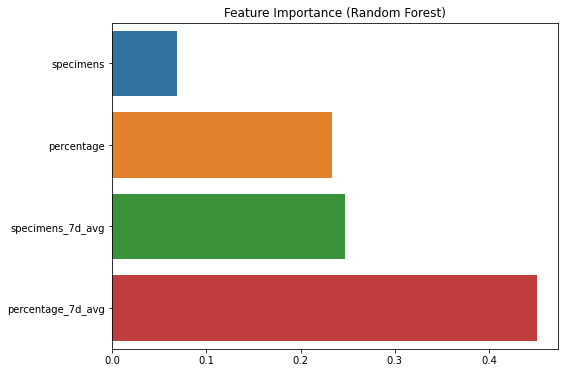

In [ ]:
feature_importances = rf_classifier.feature_importances_
features = X.columns

plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importance (Random Forest)')
plt.show()

In [ ]:
from tabulate import tabulate

rf_accuracy = accuracy_score(y_test, y_pred_rf)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

# Create a list of dictionaries for each algorithm's performance
data = [
    {'Algorithm': 'Random Forest', 'Accuracy': rf_accuracy},
    {'Algorithm': 'SVM', 'Accuracy': svm_accuracy}
]

# Create a comparison table using tabulate
table = tabulate(data, headers='keys', tablefmt='grid')

# Print the table
print(table)

+---------------+------------+
| Algorithm     |   Accuracy |
+===============+============+
| Random Forest |   0.432083 |
+---------------+------------+
| SVM           |   0.287193 |
+---------------+------------+
